In [11]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("~/dev/gachon-ai/datasets/abalone.csv")
df.drop("id", axis=1, inplace=True)

df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [12]:
df = pd.get_dummies(df, columns=['Sex'])

X = df.drop('Rings', axis=1)
y = df['Rings']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

N_EPOCHS = 20

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=32,
                    validation_split=0.1, verbose=1)

loss, mse = model.evaluate(X_test, y_test, verbose=0)


Epoch 1/20
94/94 [==============================] - 0s 1ms/step - loss: 63.9606 - mse: 63.9606 - val_loss: 22.0648 - val_mse: 22.0648
Epoch 2/20
94/94 [==============================] - 0s 575us/step - loss: 14.3271 - mse: 14.3271 - val_loss: 7.2806 - val_mse: 7.2806
Epoch 3/20
94/94 [==============================] - 0s 572us/step - loss: 7.3954 - mse: 7.3954 - val_loss: 5.0690 - val_mse: 5.0690
Epoch 4/20
94/94 [==============================] - 0s 576us/step - loss: 6.1312 - mse: 6.1312 - val_loss: 4.7420 - val_mse: 4.7420
Epoch 5/20
94/94 [==============================] - 0s 577us/step - loss: 5.6744 - mse: 5.6744 - val_loss: 4.5856 - val_mse: 4.5856
Epoch 6/20
94/94 [==============================] - 0s 563us/step - loss: 5.4214 - mse: 5.4214 - val_loss: 4.5166 - val_mse: 4.5166
Epoch 7/20
94/94 [==============================] - 0s 569us/step - loss: 5.2523 - mse: 5.2523 - val_loss: 4.3419 - val_mse: 4.3419
Epoch 8/20
94/94 [==============================] - 0s 577us/step - loss

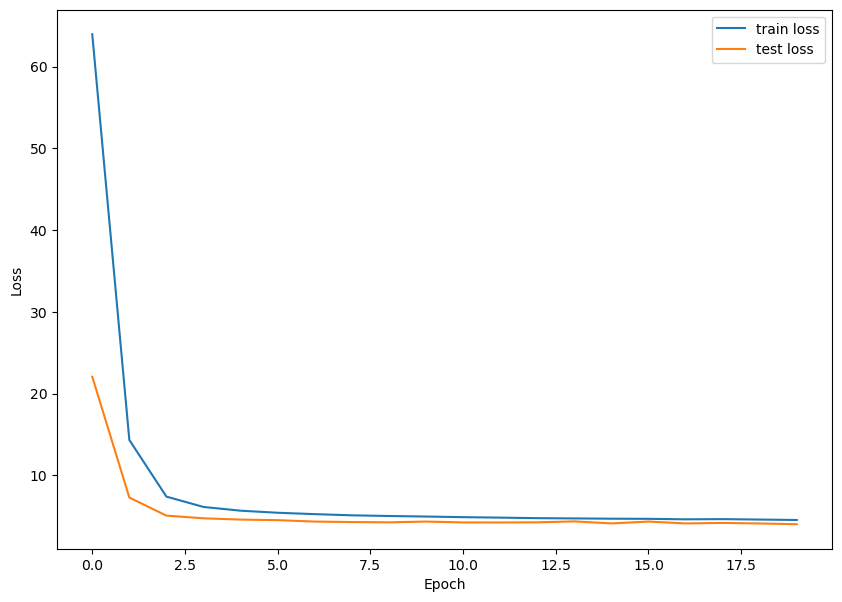

In [15]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()